In [1]:
version -- yfinance

NameError: name 'version' is not defined

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import yfinance as yf

In [6]:
df_yahoo = yf.download('AAPL', 
                      start= '2000-01-01',
                      end='2010-12-31',
                      progress=False)

Inspect the data:

In [7]:
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')

df_yahoo.head()

Downloaded 2766 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


## Getting Data from Quandl

1. Import the libraries:

In [1]:
pip install Quandl


  Obtaining dependency information for Quandl from https://files.pythonhosted.org/packages/c9/cd/54ab3484243431e02dabab1254ffde296c005e0d11346536e5e02ce6c828/Quandl-3.7.0-py2.py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import quandl

2. Authenticate using the personal API key:

In [4]:
#QUANDL_KEY = '(key)' # replace  (key) with your own API key
QUANDL_KEY = '8fAC7p1hudyfAUxfU58H'
quandl.ApiConfig.api_key = QUANDL_KEY

3. Download the data:

In [5]:
df_quandl = quandl.get(dataset='WIKI/AAPL',
                      start_date='2000-01-01',
                      end_date='2010-12-31')

4. Inspect the data:

In [6]:
print(f'Download {df_quandl.shape[0]} rows of data.')

df_quandl.head()

Download 2767 rows of data.


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


## Converting prices into returns

1. Import libraries

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf

2. Download the data and keep the Adjusted prices only

In [6]:
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

3. Converting adjusted prices to simple and log returns

In [7]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1)) 

4. Inspect the Output:

In [8]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.846127,NaN,NaN
2000-01-04,0.774790,-0.084310,-0.088077
2000-01-05,0.786128,0.014633,0.014527
2000-01-06,0.718098,-0.086538,-0.090514
2000-01-07,0.752113,0.047369,0.046281


### There's more...

1. Importing libraries and authenticate quandl key:

In [19]:
import pandas as pd
import quandl

In [20]:
#QUANDL_KEY = '(key)' # replace  (key) with your own API key
QUANDL_KEY = '8fAC7p1hudyfAUxfU58H'
quandl.ApiConfig.api_key = QUANDL_KEY

2. Creating a Dataframe with all possible dates and left join the adjusted prices on it:

In [21]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31',
                                                end='2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how='left') \
.fillna(method='ffill') \
.asfreq('M')

In [22]:
df.head()

,adj_close
1999-12-31,NaN
2000-01-31,0.784238
2000-02-29,0.866442
2000-03-31,1.026596
2000-04-30,0.937779


3. Download inflation data from Quandl:

In [24]:
df_cpi = quandl.get(dataset='RATEINF/CPI_USA',
                    start_date='1999-12-01',
                    end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.

4. Merging inflation to the prices:

In [ ]:
df_merged = df.join(df__cpi, how='left')

5. Calculate simple returns and inflation rate:

In [ ]:
df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = dfmerged.cpi.pct_change()

6. Adjust returns for inflation:

In [ ]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1)/(df_merged.inflation_rate + 1) - 1
df_merged.head()

### Changing the frequency

In [26]:
import pandas as pd
import numpy as np
import yfinance as yf

In [46]:
#downloading the AAPL data from yfinance
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                auto_adjust=False,
                progress=False)

In [47]:
# Keeping only adjusted close prices
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [48]:
df.head()

,adj_close
Date,
2000-01-03,0.846127
2000-01-04,0.774790
2000-01-05,0.786128
2000-01-06,0.718098
2000-01-07,0.752113


In [49]:
#Calculating simple returns using log
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [50]:
df.head()

,adj_close,log_rtn
Date,,
2000-01-03,0.846127,NaN
2000-01-04,0.774790,-0.088077
2000-01-05,0.786128,0.014527
2000-01-06,0.718098,-0.090514
2000-01-07,0.752113,0.046281


In [51]:
#remove redundant variables
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.head()

,log_rtn
Date,
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


1. Import Libraries:

In [52]:
import pandas as pd

2. Define the function for calculating realized volatility:

In [54]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculating monthly realized volatility:

In [56]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn':'rv'}, inplace=True)

4. Annualize the values:

In [57]:
df_rv.rv = df_rv.rv * np.sqrt(12)


5. Plot the graph

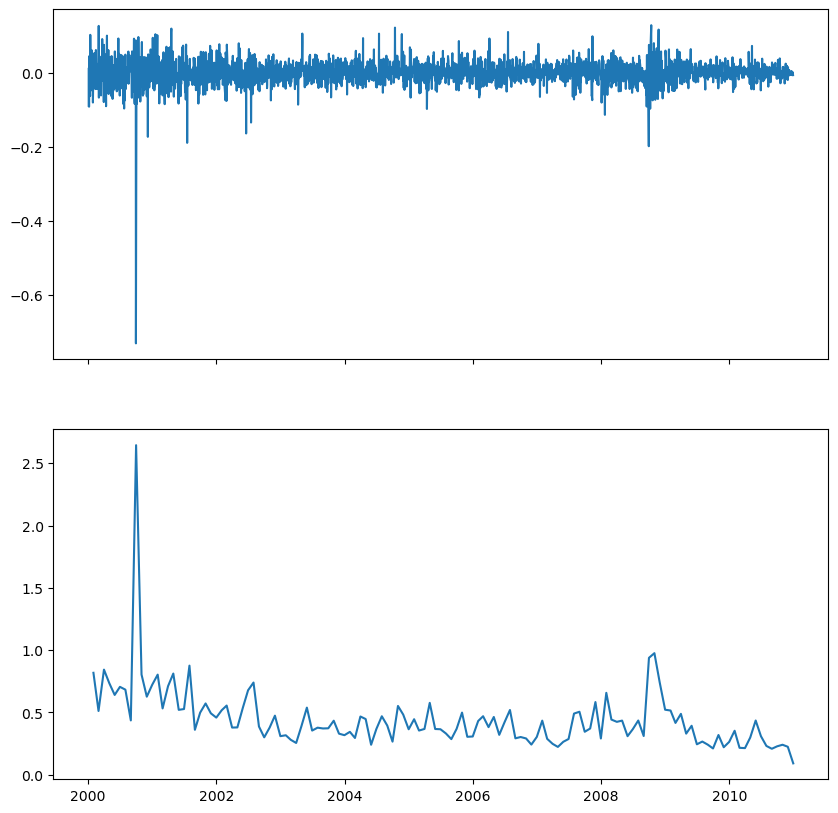

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)

#plt.tight_layout()
plt.show()